
stdevsp =

    1.1471


thresholds =

    0.8529
    2.0000
    3.1471



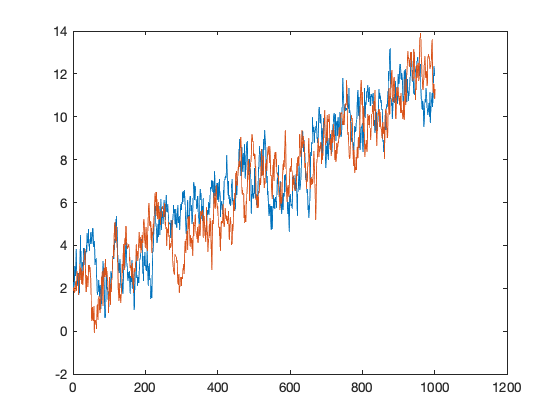

In [28]:
rho=0.9;
alpha=2;
sigma=0.5;

stdevsp = sigma/sqrt(1-rho^2)
thresholds = alpha+1*[-stdevsp;0;stdevsp]

nrep = 2;
nT = 1000;

rng(23061970);
eps = sigma*randn(nT,nrep);
spread = alpha*ones(nT+1,nrep);
for t=2:size(spread,1)
    spread(t,:)=alpha+rho*(spread(t-1,:)-alpha)+eps(t-1,:);
end
spread=spread+0.01*(0:1:nT)'*[1 1];
%spread=-spread
plot(1:nT+1,spread)
dspread = spread(2:end,:)-spread(1:end-1,:);

position = zeros(nT+1,nrep);
cumreturn=zeros(nT+1,nrep);

shortentry= spread>thresholds(3);
shortexit = spread<thresholds(2);
longexit  = spread>thresholds(2);
longentry = spread<thresholds(1);

for t=2:size(spread,1)
    position(t,:)=(position(t-1,:)==1).*(1-longexit(t,:)-shortentry(t,:))...
                 +(position(t-1,:)==0).*(longentry(t,:)-shortentry(t,:))...
                 +(position(t-1,:)==-1).*(-1+shortexit(t,:)+longentry(t,:));
    cumreturn(t,:)=cumreturn(t-1,:)+position(t-1,:).*dspread(t-1,:);
end

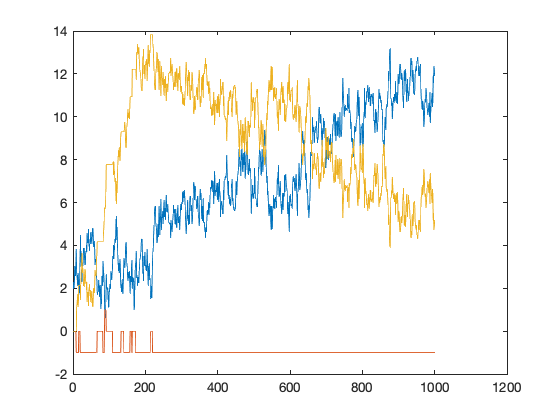

In [29]:
plot(1:nT+1,[spread(:,1) position(:,1) cumreturn(:,1)]);

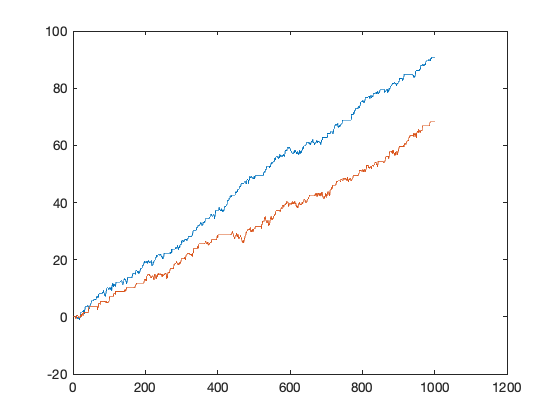

In [27]:
plot(1:nT+1,cumreturn)

In [24]:
0:3


ans =

     0     1     2     3



In [17]:
(0:3)'*[1 2]


ans =

     0     0
     1     2
     2     4
     3     6

